In [1]:
import pandas as pd

#import natural language toolkit
import nltk

# get lexicon we'll be working with today
nltk.download('vader_lexicon') 

## import word tokenizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
allSchools = pd.read_csv('allSchools.csv')
#allSchools.content = allSchools.content.astype('str')
allSchools['content'] = allSchools['content'].apply(lambda x: x.replace('\n',' ')) 
allSchools['content'] = allSchools['content'].apply(lambda x: x.replace('\r',' '))
allSchools['content'] = allSchools['content'].apply(lambda x: x.replace('\n\n',' '))



In [3]:
# To fix the lookup error produced by this cell
nltk.download('punkt')

# Provided code from lecture
allSchools['token'] = allSchools['content'].apply(word_tokenize) 

allSchools.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,school,date,content,word_count,state,month,token
0,Florida State University,28-Feb-2020,"Dear FSU Family, Florida State University con...",615,fl,2,"[Dear, FSU, Family, ,, Florida, State, Univers..."
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[This, message, to, all, faculty, and, staff, ..."
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[The, spring, semester, programs, at, Florida,..."
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students, I want to u...",256,fl,3,"[Dear, Faculty, ,, Staff, and, Students, ,, I,..."
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[Florida, State, University, is, taking, aggre..."


In [4]:
# To fix the lookup error produced by this cell
nltk.download('stopwords')

# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words
print(stop_words)

{'hasn', 'had', 'yourself', 'at', 'ma', 'yourselves', 'hadn', 'such', 'its', 'having', 'on', 'who', "won't", 's', 'myself', 'ourselves', 'just', 'during', 'more', 're', 'out', "shan't", 'didn', 'shan', 'ain', 'whom', 'through', 'should', 'what', 'for', 'me', 't', 'y', 'most', "isn't", 'same', 'am', 'his', 'with', 'has', 'each', 'm', "doesn't", 'itself', 'here', "hadn't", "should've", 'ours', 'so', "mustn't", 'that', 'do', "wouldn't", 'does', 'we', 'your', 'from', 'my', 'their', 'then', 'of', 'or', 'above', 'over', 'wasn', 'you', "it's", 'if', 'now', 'while', 'were', 'between', "weren't", "didn't", 'too', 'very', "couldn't", 'himself', 'd', "you'd", 'doing', 'our', 'it', 'wouldn', 'was', 'this', 'by', "hasn't", 'shouldn', 'll', 'to', 'few', 'being', 'doesn', 'haven', 'hers', "shouldn't", "aren't", 'mustn', 'him', 'other', "she's", 'until', 'than', 'about', 'how', "needn't", 'once', "that'll", 'don', 'nor', 'couldn', 'an', "don't", 'yours', 'can', 'some', 'down', "haven't", 'those', 'up'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dillon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# remove stop words
allSchools['stop'] = allSchools['token'].apply(lambda x: [item for item in x if item not in stop_words])
allSchools.head()

,school,date,content,word_count,state,month,token,stop
0,Florida State University,28-Feb-2020,"Dear FSU Family, Florida State University con...",615,fl,2,"[Dear, FSU, Family, ,, Florida, State, Univers...","[Dear, FSU, Family, ,, Florida, State, Univers..."
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[This, message, to, all, faculty, and, staff, ...","[This, message, faculty, staff, approved, Kyle..."
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[The, spring, semester, programs, at, Florida,...","[The, spring, semester, programs, Florida, Sta..."
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students, I want to u...",256,fl,3,"[Dear, Faculty, ,, Staff, and, Students, ,, I,...","[Dear, Faculty, ,, Staff, Students, ,, I, want..."
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[Florida, State, University, is, taking, aggre...","[Florida, State, University, taking, aggressiv..."


In [6]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [7]:
allSchools['stem'] = allSchools['stop'].apply(lambda x: [ps.stem(y) for y in x])
allSchools.head()

,school,date,content,word_count,state,month,token,stop,stem
0,Florida State University,28-Feb-2020,"Dear FSU Family, Florida State University con...",615,fl,2,"[Dear, FSU, Family, ,, Florida, State, Univers...","[Dear, FSU, Family, ,, Florida, State, Univers...","[dear, fsu, famili, ,, florida, state, univers..."
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[This, message, to, all, faculty, and, staff, ...","[This, message, faculty, staff, approved, Kyle...","[thi, messag, faculti, staff, approv, kyle, cl..."
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[The, spring, semester, programs, at, Florida,...","[The, spring, semester, programs, Florida, Sta...","[the, spring, semest, program, florida, state,..."
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students, I want to u...",256,fl,3,"[Dear, Faculty, ,, Staff, and, Students, ,, I,...","[Dear, Faculty, ,, Staff, Students, ,, I, want...","[dear, faculti, ,, staff, student, ,, I, want,..."
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[Florida, State, University, is, taking, aggre...","[Florida, State, University, taking, aggressiv...","[florida, state, univers, take, aggress, step,..."


In [8]:
# get series of all words after stemming
stem_allSchools = allSchools['stem'].apply(pd.Series).stack()

In [9]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_allSchools = FreqDist(stem_allSchools)


# remove punctuation counts
for punc in string.punctuation:
    del fdist_allSchools[punc]

In [10]:
# Frequency Distribution Plot - top 20

# for words in what students like most
fdist_allSchools.plot(20, cumulative=False)

<Figure size 640x480 with 1 Axes>

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

In [12]:
# Some text taken from UC Santa Cruz's first COVID-19 update
analyser.polarity_scores(""""We know that many of you are concerned about the recent appearance of the coronavirus. 
                         Although there have been no confirmed cases on campus, we want to provide you with some 
                         information about how to protect your health.""")

{'neg': 0.054, 'neu': 0.852, 'pos': 0.095, 'compound': 0.1779}

In [13]:
# get list of the 'sentences' (responses) from each individual
allSchools_list = list(allSchools['content'].values)

In [14]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [15]:
# get sentiment measures
allSchools_sentiments = get_sentiments(allSchools_list)

In [16]:
allSchools_sentiments.head()

,compound,neg,neu,pos,sentence
0,0.9751,0.070,0.822,0.108,"Dear FSU Family, Florida State University con..."
1,0.5994,0.027,0.919,0.054,This message to all faculty and staff has been...
2,0.2023,0.025,0.946,0.030,The spring semester programs at Florida State ...
3,0.8658,0.050,0.865,0.086,"Dear Faculty, Staff and Students, I want to u..."
4,-0.9461,0.117,0.797,0.086,Florida State University is taking aggressive ...


In [17]:
allSchools_sentiments.describe()

,compound,neg,neu,pos
count,899.000000,899.000000,899.000000,899.000000
mean,0.748310,0.035892,0.857274,0.106801
std,0.503932,0.030020,0.054778,0.048610
min,-0.999100,0.000000,0.530000,0.000000
25%,0.870450,0.016000,0.823500,0.075000
50%,0.976900,0.030000,0.857000,0.106000
75%,0.993350,0.049500,0.891000,0.137000
max,0.999900,0.272000,1.000000,0.362000


In [18]:
allShools_sent = allSchools.drop(['token', 'stop'], axis = 1)\
.assign(pos = allSchools_sentiments['pos'])\
.assign(neg = allSchools_sentiments['neg'])\
.assign(neu = allSchools_sentiments['neu'])\
.assign(compound = allSchools_sentiments['compound'])

In [19]:
allShools_sent.head()

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,28-Feb-2020,"Dear FSU Family, Florida State University con...",615,fl,2,"[dear, fsu, famili, ,, florida, state, univers...",0.108,0.070,0.822,0.9751
1,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[thi, messag, faculti, staff, approv, kyle, cl...",0.054,0.027,0.919,0.5994
2,Florida State University,2-Mar-2020,The spring semester programs at Florida State ...,150,fl,3,"[the, spring, semest, program, florida, state,...",0.030,0.025,0.946,0.2023
3,Florida State University,3-Mar-2020,"Dear Faculty, Staff and Students, I want to u...",256,fl,3,"[dear, faculti, ,, staff, student, ,, I, want,...",0.086,0.050,0.865,0.8658
4,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[florida, state, univers, take, aggress, step,...",0.086,0.117,0.797,-0.9461


In [20]:
allShools_sent.to_csv('allShools_sent.csv', index = False)

In [21]:
#pd.read_csv('allShools_sent.csv').head()

In [39]:
# separating out any messages containing the word 'sad'
sad_df = allSchools
sad_df = sad_df[sad_df['content'].str.contains("sad", case=False)]
sad_df = sad_df.reset_index(drop = True)

In [40]:
sad_df_list = list(sad_df['content'].values)

In [41]:
sad_df_sentiments = get_sentiments(sad_df_list)
sad_df_sentiments.head()

,compound,neg,neu,pos,sentence
0,0.9886,0.021,0.806,0.173,The Ringling is committed to doing our part to...
1,0.9230,0.000,0.791,0.209,VocaLibre is an auditioned group of Texas Sta...
2,0.9950,0.028,0.839,0.133,"Today, several additional key precautions were..."
3,0.9903,0.050,0.777,0.173,Many of you have reached out to inquire about ...
4,0.9580,0.058,0.838,0.105,"Dear Anteaters, As the week comes to an end,..."


In [42]:
sad_df_sentiments.describe()

,compound,neg,neu,pos
count,23.000000,23.000000,23.000000,23.000000
mean,0.802870,0.050478,0.820696,0.128913
std,0.569075,0.039610,0.041453,0.035212
min,-0.999100,0.000000,0.728000,0.066000
25%,0.948900,0.031000,0.788000,0.102500
50%,0.990300,0.040000,0.829000,0.123000
75%,0.994800,0.053000,0.845000,0.151500
max,0.999000,0.172000,0.900000,0.209000


In [43]:
sad_df_sent = sad_df.drop(['token', 'stop'], axis = 1)\
.assign(pos = sad_df_sentiments['pos'])\
.assign(neg = sad_df_sentiments['neg'])\
.assign(neu = sad_df_sentiments['neu'])\
.assign(compound = sad_df_sentiments['compound'])
sad_df_sent

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,16-Mar-2020,The Ringling is committed to doing our part to...,259,fl,3,"[the, ringl, commit, part, safeguard, health, ...",0.173,0.021,0.806,0.9886
1,Texas State University,8-Apr-2020,VocaLibre is an auditioned group of Texas Sta...,61,tex,4,"[vocalibr, audit, group, texa, state, univers,...",0.209,0.000,0.791,0.9230
2,University of Central Florida,17-Mar-2020,"Today, several additional key precautions were...",489,fl,3,"[today, ,, sever, addit, key, precaut, put, pl...",0.133,0.028,0.839,0.9950
3,Berkeley,23-Mar-2020,Many of you have reached out to inquire about ...,328,cal,3,"[mani, reach, inquir, plan, commenc, may, ., y...",0.173,0.050,0.777,0.9903
4,Irvine,31-Jan-2020,"Dear Anteaters, As the week comes to an end,...",384,cal,1,"[dear, anteat, ,, As, week, come, end, ,, I, w...",0.105,0.058,0.838,0.9580
5,Irvine,14-Feb-2020,The Coronavirus pandemic is a global event aff...,638,cal,2,"[the, coronaviru, pandem, global, event, affec...",0.099,0.053,0.848,0.9726
6,Irvine,13-Mar-2020,"Dear UCI Students, I am writing as a follow-u...",549,cal,3,"[dear, uci, student, ,, I, write, follow-up, c...",0.108,0.032,0.861,0.9905
7,Irvine,16-Mar-2020,"Dear UCI Students, We are writing to follow u...",316,cal,3,"[dear, uci, student, ,, We, write, follow, ann...",0.144,0.019,0.837,0.9920
8,Irvine,19-Mar-2020,"Dear Colleagues, As we prepare for a spring ...",885,cal,3,"[dear, colleagu, ,, As, prepar, spring, quarte...",0.148,0.019,0.834,0.9988
9,Irvine,23-Mar-2020,Dear UCI Post-Docs: I am truly sorry that you...,826,cal,3,"[dear, uci, post-doc, :, I, truli, sorri, firs...",0.120,0.037,0.843,0.9946


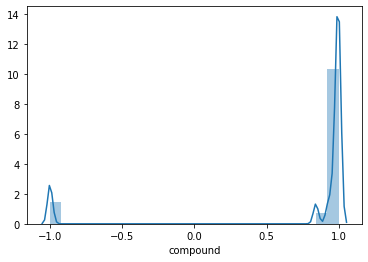

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.distplot(sad_df_sent.loc[sad_df_sent['state'] == 'cal']['compound'], kde = True, bins=25)

In [30]:
hope_df = allSchools
hope_df = hope_df[hope_df['content'].str.contains("hope", case=False)]
hope_df

,school,date,content,word_count,state,month,token,stop,stem
24,Florida State University,24-Mar-2020,Florida State University began a new chapter i...,136,fl,3,"[Florida, State, University, began, a, new, ch...","[Florida, State, University, began, new, chapt...","[florida, state, univers, began, new, chapter,..."
35,Florida State University,16-Apr-2020,"Editors note: Names of the 7,000 graduates wil...",720,fl,4,"[Editors, note, :, Names, of, the, 7,000, grad...","[Editors, note, :, Names, 7,000, graduates, re...","[editor, note, :, name, 7,000, graduat, read, ..."
58,Texas State University,26-Mar-2020,"Dear Colleagues, As we prepare to welcome ...",611,tex,3,"[Dear, Colleagues, ,, As, we, prepare, to, wel...","[Dear, Colleagues, ,, As, prepare, welcome, ba...","[dear, colleagu, ,, As, prepar, welcom, back, ..."
64,Texas State University,27-Mar-2020,"Today, the university learned that a facult...",254,tex,3,"[Today, ,, the, university, learned, that, a, ...","[Today, ,, university, learned, faculty, membe...","[today, ,, univers, learn, faculti, member, te..."
68,Texas State University,1-Apr-2020,I hope everyone is doing well and adapting to...,323,tex,4,"[I, hope, everyone, is, doing, well, and, adap...","[I, hope, everyone, well, adapting, remote, al...","[I, hope, everyon, well, adapt, remot, altern,..."
...,...,...,...,...,...,...,...,...,...
865,USF,13-May-2020,"MAY 13, 2020STUDENTS Dear USF students: As we ...",724,fl,5,"[MAY, 13, ,, 2020STUDENTS, Dear, USF, students...","[MAY, 13, ,, 2020STUDENTS, Dear, USF, students...","[may, 13, ,, 2020student, dear, usf, student, ..."
866,USF,19-May-2020,"MAY 19, 2020COMMUNITY, FACULTY, PARENTS AND FA...",609,fl,5,"[MAY, 19, ,, 2020COMMUNITY, ,, FACULTY, ,, PAR...","[MAY, 19, ,, 2020COMMUNITY, ,, FACULTY, ,, PAR...","[may, 19, ,, 2020commun, ,, faculti, ,, parent..."
882,T_A&M_U,20-Mar-2020,"March 20, 2020, 4:00 p.m. CDT Faculty, Staff a...",275,tex,3,"[March, 20, ,, 2020, ,, 4:00, p.m., CDT, Facul...","[March, 20, ,, 2020, ,, 4:00, p.m., CDT, Facul...","[march, 20, ,, 2020, ,, 4:00, p.m., cdt, facul..."
894,T_A&M_U,1-Apr-2020,"April 1, 2020, 3:50 p.m. CDT Texas A&M Respond...",311,tex,4,"[April, 1, ,, 2020, ,, 3:50, p.m., CDT, Texas,...","[April, 1, ,, 2020, ,, 3:50, p.m., CDT, Texas,...","[april, 1, ,, 2020, ,, 3:50, p.m., cdt, texa, ..."


In [63]:
def sort_df(word):
    new = allSchools[allSchools['content'].str.contains(word, case=False)]
    new = new.reset_index(drop = True)
    new_list = list(new['content'].values)
    new_sentiments = get_sentiments(new_list)
    
    new = new.drop(['token', 'stop'], axis = 1)
    new = new.assign(pos = new_sentiments['pos'])
    new = new.assign(neg = new_sentiments['neg'])
    new = new.assign(neu = new_sentiments['neu'])
    new = new.assign(compound = new_sentiments['compound'])
    
    return new

In [64]:
sort_df('sad')

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,16-Mar-2020,The Ringling is committed to doing our part to...,259,fl,3,"[the, ringl, commit, part, safeguard, health, ...",0.173,0.021,0.806,0.9886
1,Texas State University,8-Apr-2020,VocaLibre is an auditioned group of Texas Sta...,61,tex,4,"[vocalibr, audit, group, texa, state, univers,...",0.209,0.000,0.791,0.9230
2,University of Central Florida,17-Mar-2020,"Today, several additional key precautions were...",489,fl,3,"[today, ,, sever, addit, key, precaut, put, pl...",0.133,0.028,0.839,0.9950
3,Berkeley,23-Mar-2020,Many of you have reached out to inquire about ...,328,cal,3,"[mani, reach, inquir, plan, commenc, may, ., y...",0.173,0.050,0.777,0.9903
4,Irvine,31-Jan-2020,"Dear Anteaters, As the week comes to an end,...",384,cal,1,"[dear, anteat, ,, As, week, come, end, ,, I, w...",0.105,0.058,0.838,0.9580
5,Irvine,14-Feb-2020,The Coronavirus pandemic is a global event aff...,638,cal,2,"[the, coronaviru, pandem, global, event, affec...",0.099,0.053,0.848,0.9726
6,Irvine,13-Mar-2020,"Dear UCI Students, I am writing as a follow-u...",549,cal,3,"[dear, uci, student, ,, I, write, follow-up, c...",0.108,0.032,0.861,0.9905
7,Irvine,16-Mar-2020,"Dear UCI Students, We are writing to follow u...",316,cal,3,"[dear, uci, student, ,, We, write, follow, ann...",0.144,0.019,0.837,0.9920
8,Irvine,19-Mar-2020,"Dear Colleagues, As we prepare for a spring ...",885,cal,3,"[dear, colleagu, ,, As, prepar, spring, quarte...",0.148,0.019,0.834,0.9988
9,Irvine,23-Mar-2020,Dear UCI Post-Docs: I am truly sorry that you...,826,cal,3,"[dear, uci, post-doc, :, I, truli, sorri, firs...",0.120,0.037,0.843,0.9946


In [77]:
control_df_sent = sort_df('control')

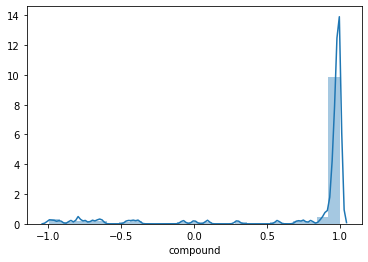

In [78]:
sns.distplot(control_df_sent.loc[control_df_sent['state'] == 'cal']['compound'], kde = True, bins=25)

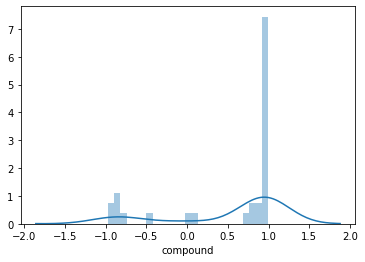

In [79]:
sns.distplot(control_df_sent.loc[control_df_sent['state'] == 'tex']['compound'], kde = True, bins=25)

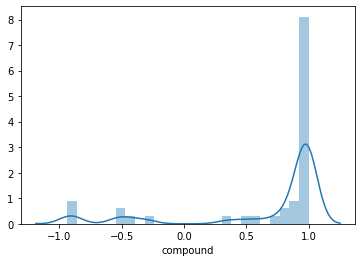

In [80]:
sns.distplot(control_df_sent.loc[control_df_sent['state'] == 'fl']['compound'], kde = True, bins=25)

In [178]:
soon_df_sent = sort_df('soon')
soon_df_sent

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,28-Feb-2020,"Dear FSU Family, Florida State University con...",615,fl,2,"[dear, fsu, famili, ,, florida, state, univers...",0.108,0.070,0.822,0.9751
1,Florida State University,16-Mar-2020,"UPDATED (March 19, 2020): The main campus Test...",177,fl,3,"[updat, (, march, 19, ,, 2020, ), :, the, main...",0.045,0.014,0.941,0.6808
2,Florida State University,16-Mar-2020,The Ringling is committed to doing our part to...,259,fl,3,"[the, ringl, commit, part, safeguard, health, ...",0.173,0.021,0.806,0.9886
3,Florida State University,17-Mar-2020,University remains open for business; coursewo...,600,fl,3,"[univers, remain, open, busi, ;, coursework, r...",0.073,0.010,0.916,0.9896
4,Florida State University,15-Apr-2020,Congratulations on being accepted to FSU! Welc...,2980,fl,4,"[congratul, accept, fsu, !, welcom, commun, .,...",0.120,0.014,0.866,0.9999
...,...,...,...,...,...,...,...,...,...,...,...
141,USF,13-May-2020,"MAY 13, 2020STUDENTS Dear USF students: As we ...",724,fl,5,"[may, 13, ,, 2020student, dear, usf, student, ...",0.170,0.019,0.811,0.9987
142,USF,19-May-2020,"MAY 19, 2020COMMUNITY, FACULTY, PARENTS AND FA...",609,fl,5,"[may, 19, ,, 2020commun, ,, faculti, ,, parent...",0.127,0.013,0.860,0.9962
143,T_A&M_U,13-Mar-2020,"Updated: March 13, 2020, 5:45 p.m. CDT Dear Te...",1474,tex,3,"[updat, :, march, 13, ,, 2020, ,, 5:45, p.m., ...",0.106,0.046,0.848,0.9985
144,T_A&M_U,23-Mar-2020,"Update: March 23, 2020, 6 p.m. CDT At 4:30 p.m...",345,tex,3,"[updat, :, march, 23, ,, 2020, ,, 6, p.m., cdt...",0.083,0.000,0.917,0.9741


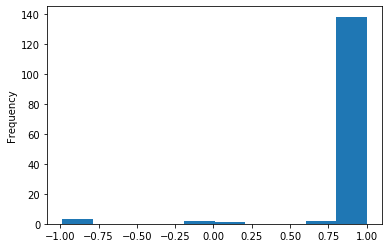

In [179]:
soon_df_sent['compound'].plot.hist()

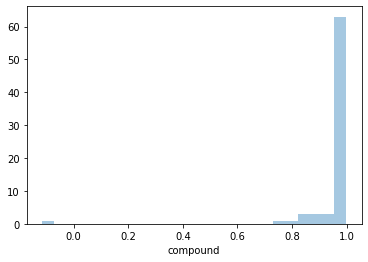

In [180]:
sns.distplot(soon_df_sent.loc[soon_df_sent['state'] == 'cal']['compound'], kde = False, bins=25)

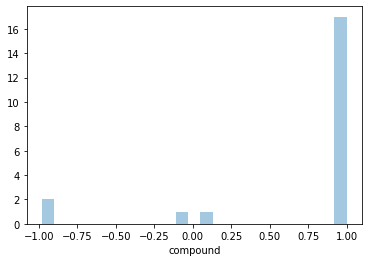

In [181]:
sns.distplot(soon_df_sent.loc[soon_df_sent['state'] == 'tex']['compound'], kde = False, bins=25)

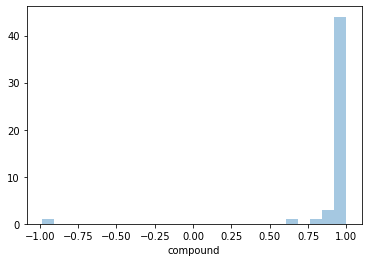

In [182]:
sns.distplot(soon_df_sent.loc[soon_df_sent['state'] == 'fl']['compound'], kde = False, bins=25)

In [106]:
announce_df_sent = sort_df('announce')
announce_df_sent.head()

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,12-Mar-2020,Florida State University continues to monitor ...,595,fl,3,"[florida, state, univers, continu, monitor, co...",0.087,0.030,0.883,0.9804
1,Florida State University,12-Mar-2020,"Statement from Florida State: Tallahassee, Fl...",202,fl,3,"[statement, florida, state, :, tallahasse, ,, ...",0.115,0.045,0.839,0.9501
2,Florida State University,16-Mar-2020,The Ringling is committed to doing our part to...,259,fl,3,"[the, ringl, commit, part, safeguard, health, ...",0.173,0.021,0.806,0.9886
3,Florida State University,17-Mar-2020,In accordance with the announcement made by th...,264,fl,3,"[In, accord, announc, made, atlant, coast, con...",0.079,0.017,0.904,0.9460
4,Florida State University,17-Mar-2020,University remains open for business; coursewo...,600,fl,3,"[univers, remain, open, busi, ;, coursework, r...",0.073,0.010,0.916,0.9896


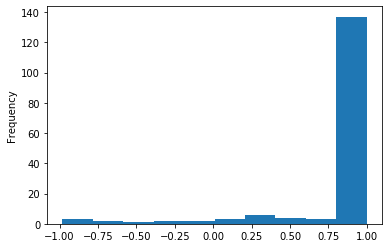

In [174]:
announce_df_sent['compound'].plot.hist()

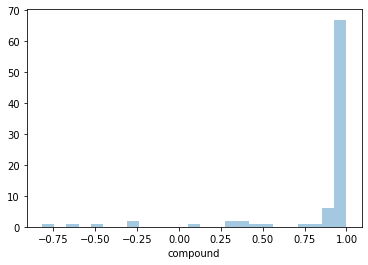

In [175]:
sns.distplot(announce_df_sent.loc[announce_df_sent['state'] == 'cal']['compound'], kde = False, bins=25)

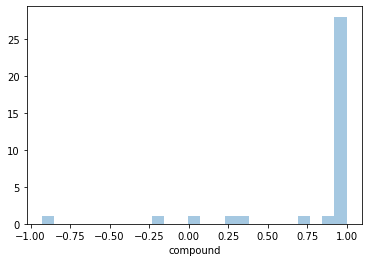

In [176]:
sns.distplot(announce_df_sent.loc[announce_df_sent['state'] == 'tex']['compound'], kde = False, bins=25)

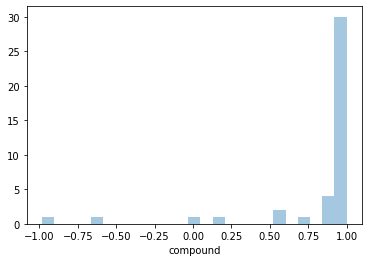

In [177]:
sns.distplot(announce_df_sent.loc[announce_df_sent['state'] == 'fl']['compound'], kde = False, bins=25)

In [112]:
unique = allSchools['stem'].values.flatten()

array([list(['dear', 'fsu', 'famili', ',', 'florida', 'state', 'univers', 'continu', 'close', 'monitor', 'advisori', 'updat', 'center', 'diseas', 'control', 'concern', 'covid-19', 'coronaviru', 'spread', 'mani', 'countri', '.', 'the', 'safeti', 'student', ',', 'faculti', 'staff', 'paramount', 'concern', '.', 'As', 'head', 'spring', 'break', 'mani', 'peopl', 'move', ',', 'I', 'want', 'updat', 'action', 'univers', 'take', 'protect', 'campu', 'commun', '.', 'fsu', 'suspend', 'travel', 'china', 'south', 'korea', ',', 'warn', 'level', 'set', 'cdc', 'level', '3', '.', 'travel', 'author', 'travel', 'nation', 'notic', '.', 'heighten', 'level', 'alert', 'also', 'exist', 'japan', ',', 'iran', 'itali', ',', 'current', 'level', '2', '.', 'We', 'suspend', 'univers', 'relat', 'faculti', 'staff', 'travel', 'countri', ',', 'well', ',', 'without', 'approv', 'divis', 'vice', 'presid', '.', 'If', 'visit', 'countri', 'warn', 'level', 'affect', 'area', 'strongli', 'encourag', 'self-isol', 'quarantin', 'per

In [115]:
sort_df('cost')

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,25-Mar-2020,Some of the most memorable experiences for Flo...,569,fl,3,"[some, memor, experi, florida, state, univers,...",0.128,0.008,0.864,0.9945
1,Florida State University,15-Apr-2020,Congratulations on being accepted to FSU! Welc...,2980,fl,4,"[congratul, accept, fsu, !, welcom, commun, .,...",0.120,0.014,0.866,0.9999
2,Florida State University,12-May-2020,"_More than 12,500 Florida State University stu...",304,fl,5,"[_more, 12,500, florida, state, univers, stude...",0.152,0.055,0.793,0.9871
3,Texas State University,5-Mar-2020,The City of San Marcos in coordination with H...,561,tex,3,"[the, citi, san, marco, coordin, hay, counti, ...",0.064,0.067,0.869,0.0812
4,Texas State University,16-Mar-2020,"Pandemic and Post-Pandemic Work Groups May 18,...",3463,tex,3,"[pandem, post-pandem, work, group, may, 18, ,,...",0.067,0.032,0.901,0.9976
...,...,...,...,...,...,...,...,...,...,...,...
79,USF,27-Apr-2020,"APRIL 27, 2020PARENTS AND FAMILY, STUDENTS Dea...",476,fl,4,"[april, 27, ,, 2020parent, and, famili, ,, stu...",0.181,0.029,0.789,0.9973
80,USF,13-May-2020,"MAY 13, 2020STUDENTS Dear USF students: As we ...",724,fl,5,"[may, 13, ,, 2020student, dear, usf, student, ...",0.170,0.019,0.811,0.9987
81,T_A&M_U,28-Feb-2020,"February 28, 2020, 5:45 p.m. CST Dear Texas A&...",564,tex,2,"[februari, 28, ,, 2020, ,, 5:45, p.m., cst, de...",0.068,0.087,0.845,-0.8442
82,T_A&M_U,17-Mar-2020,"March 17, 2020, 4:00 p.m. CDT Due to the globa...",431,tex,3,"[march, 17, ,, 2020, ,, 4:00, p.m., cdt, due, ...",0.058,0.044,0.898,0.7464


In [168]:
financ_df_sent = sort_df('coord')
financ_df_sent

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,28-Feb-2020,"Dear FSU Family, Florida State University con...",615,fl,2,"[dear, fsu, famili, ,, florida, state, univers...",0.108,0.070,0.822,0.9751
1,Florida State University,3-Mar-2020,Florida State University is taking aggressive ...,448,fl,3,"[florida, state, univers, take, aggress, step,...",0.086,0.117,0.797,-0.9461
2,Florida State University,3-Mar-2020,The CDC recommends that travelers avoid all no...,279,fl,3,"[the, cdc, recommend, travel, avoid, nonessent...",0.078,0.052,0.871,0.8112
3,Florida State University,16-Mar-2020,"UPDATED (March 19, 2020): The main campus Test...",177,fl,3,"[updat, (, march, 19, ,, 2020, ), :, the, main...",0.045,0.014,0.941,0.6808
4,Florida State University,16-Mar-2020,The University continues to monitor the impact...,437,fl,3,"[the, univers, continu, monitor, impact, covid...",0.124,0.020,0.856,0.9929
...,...,...,...,...,...,...,...,...,...,...,...
96,T_A&M_U,3-Mar-2020,"March 3, 2020, 5:45 p.m. CST Texas A&M continu...",1101,tex,3,"[march, 3, ,, 2020, ,, 5:45, p.m., cst, texa, ...",0.068,0.036,0.897,0.9840
97,T_A&M_U,12-Mar-2020,"March 12, 2020, 5:00 p.m. CDT Classes Canceled...",753,tex,3,"[march, 12, ,, 2020, ,, 5:00, p.m., cdt, class...",0.094,0.059,0.847,0.9812
98,T_A&M_U,13-Mar-2020,"Updated: March 13, 2020, 5:45 p.m. CDT Dear Te...",1474,tex,3,"[updat, :, march, 13, ,, 2020, ,, 5:45, p.m., ...",0.106,0.046,0.848,0.9985
99,T_A&M_U,23-Mar-2020,"Update: March 23, 2020, 6 p.m. CDT At 4:30 p.m...",345,tex,3,"[updat, :, march, 23, ,, 2020, ,, 6, p.m., cdt...",0.083,0.000,0.917,0.9741


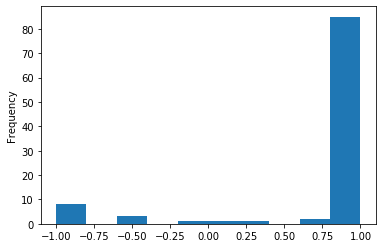

In [169]:
financ_df_sent['compound'].plot.hist()

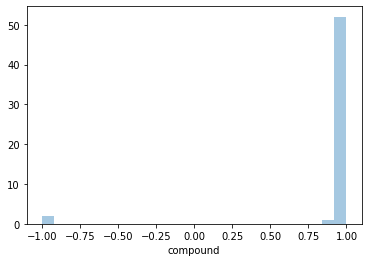

In [170]:
sns.distplot(financ_df_sent.loc[financ_df_sent['state'] == 'cal']['compound'], kde = False, bins=25)

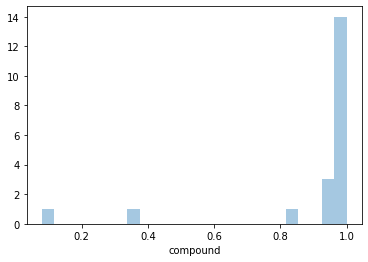

In [171]:
sns.distplot(financ_df_sent.loc[financ_df_sent['state'] == 'tex']['compound'], kde = False, bins=25)

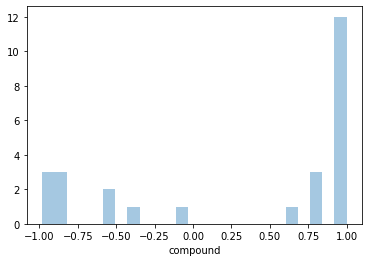

In [173]:
sns.distplot(financ_df_sent.loc[financ_df_sent['state'] == 'fl']['compound'], kde = False, bins=25)

In [185]:
anticipat_df_sent = sort_df('anticipat')

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,30-Apr-2020,Florida State University administrators are aw...,30,fl,4,"[florida, state, univers, administr, awar, pla...",0.000,0.000,1.000,0.0000
1,Florida State University,5-May-2020,"On April 29, 2020, Governor Ron DeSantis issue...",970,fl,5,"[On, april, 29, ,, 2020, ,, governor, ron, des...",0.073,0.047,0.880,0.9786
2,Texas State University,5-Mar-2020,The City of San Marcos in coordination with H...,561,tex,3,"[the, citi, san, marco, coordin, hay, counti, ...",0.064,0.067,0.869,0.0812
3,Texas State University,26-Mar-2020,"Dear Colleagues, As we prepare to welcome ...",611,tex,3,"[dear, colleagu, ,, As, prepar, welcom, back, ...",0.092,0.036,0.873,0.9863
4,Texas State University,1-May-2020,In preparation to resume in-person teaching f...,302,tex,5,"[In, prepar, resum, in-person, teach, class, h...",0.109,0.039,0.852,0.9565
...,...,...,...,...,...,...,...,...,...,...,...
63,USF,21-Mar-2020,"MARCH 21, 2020FACULTY Dear Colleagues, As USF’...",1000,fl,3,"[march, 21, ,, 2020faculti, dear, colleagu, ,,...",0.144,0.042,0.814,0.9986
64,USF,2-Apr-2020,"APRIL 2, 2020PARENTS AND FAMILY, STUDENTS FOR ...",321,fl,4,"[april, 2, ,, 2020parent, and, famili, ,, stud...",0.118,0.060,0.823,0.9486
65,USF,27-Apr-2020,"APRIL 27, 2020FACULTY Dear Colleagues, As we b...",1307,fl,4,"[april, 27, ,, 2020faculti, dear, colleagu, ,,...",0.142,0.026,0.832,0.9993
66,T_A&M_U,2-Mar-2020,"March 2, 2020, 7:55 p.m. CST Texas A&M Univers...",669,tex,3,"[march, 2, ,, 2020, ,, 7:55, p.m., cst, texa, ...",0.083,0.056,0.860,0.9349


In [189]:
immediate_df_sent = sort_df('immediate')

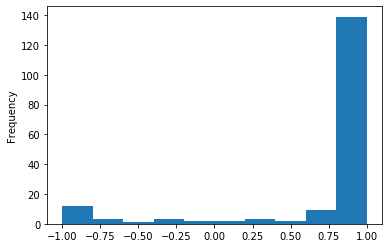

In [190]:
immediate_df_sent['compound'].plot.hist()

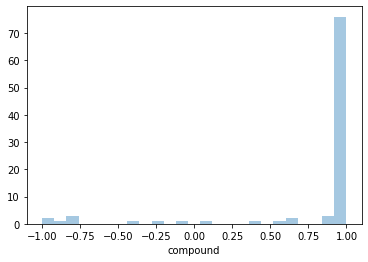

In [191]:
sns.distplot(immediate_df_sent.loc[immediate_df_sent['state'] == 'cal']['compound'], kde = False, bins=25)

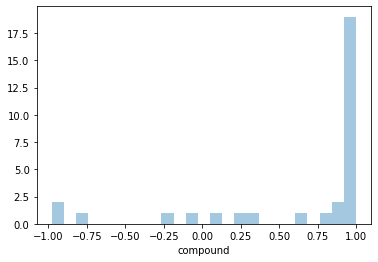

In [192]:
sns.distplot(immediate_df_sent.loc[immediate_df_sent['state'] == 'tex']['compound'], kde = False, bins=25)

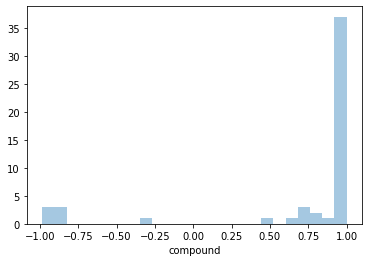

In [193]:
sns.distplot(immediate_df_sent.loc[immediate_df_sent['state'] == 'fl']['compound'], kde = False, bins=25)

In [194]:
protocol_df_sent = sort_df('protocol')

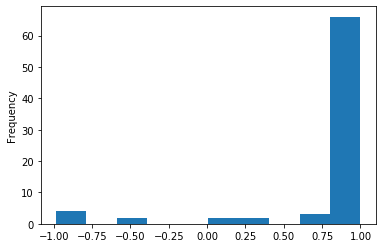

In [195]:
protocol_df_sent['compound'].plot.hist()

In [197]:
process_df = sort_df('process')
process_df 

,school,date,content,word_count,state,month,stem,pos,neg,neu,compound
0,Florida State University,28-Feb-2020,This message to all faculty and staff has been...,175,fl,2,"[thi, messag, faculti, staff, approv, kyle, cl...",0.054,0.027,0.919,0.5994
1,Florida State University,3-Mar-2020,The CDC recommends that travelers avoid all no...,279,fl,3,"[the, cdc, recommend, travel, avoid, nonessent...",0.078,0.052,0.871,0.8112
2,Florida State University,16-Mar-2020,"UPDATED (March 19, 2020): The main campus Test...",177,fl,3,"[updat, (, march, 19, ,, 2020, ), :, the, main...",0.045,0.014,0.941,0.6808
3,Florida State University,25-Mar-2020,"Dear Students, This is an unprecedented time ...",345,fl,3,"[dear, student, ,, thi, unpreced, time, florid...",0.067,0.019,0.913,0.9432
4,Florida State University,1-Apr-2020,As a result of Governor DeSantis safer at home...,1028,fl,4,"[As, result, governor, desanti, safer, home, o...",0.096,0.063,0.841,0.9910
...,...,...,...,...,...,...,...,...,...,...,...
169,USF,1-May-2020,"MAY 1, 2020COMMUNITY, FACULTY, PARENTS AND FAM...",507,fl,5,"[may, 1, ,, 2020commun, ,, faculti, ,, parent,...",0.146,0.043,0.811,0.9932
170,USF,19-May-2020,"MAY 19, 2020COMMUNITY, FACULTY, PARENTS AND FA...",609,fl,5,"[may, 19, ,, 2020commun, ,, faculti, ,, parent...",0.127,0.013,0.860,0.9962
171,T_A&M_U,19-Mar-2020,"March 19, 2020, 5:30 p.m. CDT At the direction...",285,tex,3,"[march, 19, ,, 2020, ,, 5:30, p.m., cdt, At, d...",0.083,0.071,0.846,0.5859
172,T_A&M_U,23-Mar-2020,"March 23, 2020, 10:30 a.m. CDT Dear Faculty an...",496,tex,3,"[march, 23, ,, 2020, ,, 10:30, a.m., cdt, dear...",0.227,0.013,0.760,0.9987


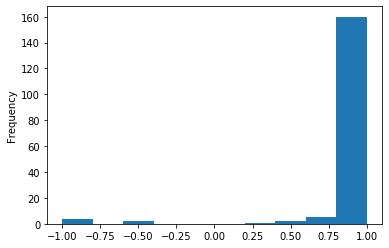

In [199]:
process_df['compound'].plot.hist()